In [11]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

#### scales pixels value to 0-1 range and returns the image

In [12]:
def scale_image_data(data):
    return (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data))

#### opening each .fits file and scaling the data

In [13]:
with fits.open('./data/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits') as hdul:
    data_f160w = scale_image_data(hdul[0].data)
with fits.open('./data/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits') as hdul:
    data_f125w = scale_image_data(hdul[0].data)
with fits.open('./data/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') as hdul:
    data_f105w = scale_image_data(hdul[0].data)

#### creating a new image with the rgb value of the 160, 125 and 105 images

In [14]:
rgb_image = np.zeros((data_f160w.shape[0], data_f160w.shape[1], 3))
rgb_image[..., 0] = data_f160w
rgb_image[..., 1] = data_f125w
rgb_image[..., 2] = data_f105w 

#### displaying the false color image and saving it

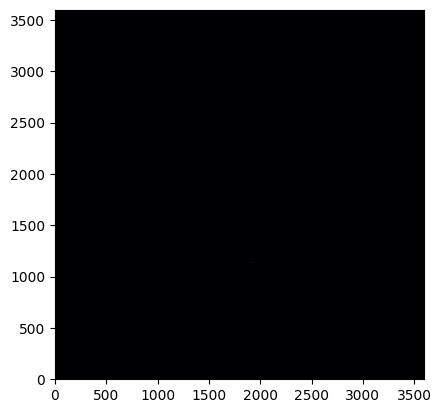

In [15]:
plt.imshow(rgb_image, origin='lower')
plt.savefig('./data/hudf_false_color.png')